<a href="_index.ipynb">&larr; LAB </a>&loz;
<a href="../../README.md"> &uarr; TOC &uarr; </a>
<img src='../_img/icon.svg' align='right' width='10%'></img>

<b>Name, Vorname: Hainsch, David ; Ramic, Eldin ; Lindenschmidt, Julian ; Postel, Georg</b> 

### Inhalt
[0. Allgemeine Hinweise](#allgemeines)

[1. Einführung](#intro)

[2. Diskrete Faltung](#convolution)

[3. LTI-Systeme](#lti-system)

# 0. Allgemeine Hinweise<a id='allgemeines'></a>
## 0.1 Vor dem Versuch
Bitte bereiten Sie die wie folgt gekennzeichneten Blöcke <i>vor</i> dem Praktikumsversuch vor, tragen Sie Ihren Namen oben und die Antworten ins Notebook ein und speichern Sie es lokal oder auf dem Notebookserver https://notebook.gesis.org unter dem Namen "Lab1_Nachname_Vorname" (File -> Save Notebook As ...) ab.<br />
    
<div class="alert alert-block alert-info">
   <b> VORBEREITUNG:</b>
</div>

**Beispiel**

* Geben Sie die Systemfunktion eines Differenzierers an

$H(z) = 1 - z^{-1}$

* Welche Filter sind für die Praxis am wichtigsten?

**Kaffeefilter** und *Spamfilter*

***
Simulationsaufgaben werden gemeinsam im Praktikum bearbeitet, sie sind gekennzeichnet durch

<div class="alert alert-block alert-warning"><b> SIMULATION:</b></div>

***

## 0.2 Tipps zum Schreiben und Coden
* \<SHIFT\>-\<RETURN\> führt eine Codezelle aus und rendert eine Textzelle.
* In Markdown sind Leerzeilen wichtig zum Trennen von Abschnitten! 
* Sie können LaTeX-Code zwischen \\$ ... \\$ einschließen.
* Kontexthilfe zu Funktionen etc. bekommen Sie über \<SHIFT\>-\<TAB\>

***
## 0.3 Nach dem Versuch
Nach dem Praktikumsversuch exportieren Sie das Notebook mit Textantworten, Codezellen und Plots als HTML (File -> Export Notebook As ... -> Export Notebook to HTML) und reichen es in Moodle ein.</div><br />

***
Abbildungen in diesem Notebook wurden konvertiert mit https://www.base64-image.de/ und in den HTML-Code eingebettet.

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
import dsp_fpga_lib as dsp
dsp.versions() # print versions 
    
%matplotlib inline
import matplotlib.pyplot as plt
size = {"figsize":(12,6)} # Plotgröße in Inch

import numpy as np
import scipy.signal as sig
import wave

from IPython.display import Audio, display

Python version: 3.7.6
Numpy: 1.18.1
Scipy: 1.4.1
Matplotlib: 3.1.3 module://ipykernel.pylab.backend_inline


# LAB 1: Intro, Faltung zeitdiskreter Signale und LTI-Systeme
## 1. Einführung<a id='intro'></a>

In diesem Abschnitt erstellen Sie verschiedene Signale, plotten sie und machen sie hörbar.

Zunächst generieren wir ein Sinussignal der Länge $T=2$ s und der Frequenz $f_a = 440$ Hz, das mit $f_S = 8$ kHz abgetastet wird.

Bitte bereiten Sie die wie folgt gekennzeichneten Blöcke vor dem Praktikum vor:
<div class="alert alert-block alert-info">
<b>VORBEREITUNG:</b>
</div>

* Wie viele Datenpunkte $N$ und wie viele Perioden $L$ umfasst das Signal? $L = 2s/T_a = 2s*f_a = 880$, $N = T*f_S = 16*10^3$
* Wie groß ist die Abtastperiode $T_S$?

$T_S = 1 / f_S = 125\,\mu s$
***

## 1.1 Signalerzeugung
<div class="alert alert-block alert-warning"><b> SIMULATION:</b></div>

**Achtung:** Bei der Angabe von Bereichen ist in Python das letzte Element immer ausgeschlossen - `a = np.arange(10)` erzeugt ein Array mit den Zahlen 0 ... 9; `a[3:7] = [3, 4, 5, 6]`, Element Nr. 7 ist gerade eben nicht mehr dabei. Im Gegensatz zu Matlab nutzt Python 0-based indexing, d.h. das erste Element eines Arrays ist `a[0]`. 

* Erzeugen Sie ein Index-Array `n` mit $N$ ganzzahligen Elementen mit der numpy Funktion `n = np.arange(end)` d.h. `n = np.arange(start, end, step)` mit den Defaultwerten `start=0` und `step=1` und `end=N`.

* Erzeugen Sie ein Zeit-Array `t` mit $N$ reellwertigen Elementen im Abstand $T_S$ über `t = np.linspace(start, end, N)` mit `end=N T_S`. Prinzipiell geht das auch mit `t = np.arange(0, N * T_S, T_S)`, hier besteht aber die Gefahr dass das Array wegen Rundungsfehlern ein Element mehr enthält als erwartet.

* Stellen Sie mit `len()` sicher, dass die Längen der beiden Vektoren identisch sind.

* Stellen Sie die Funktionen `y1 = sin( ... n)` und  `y2 = sin( ... t)` so auf, dass beide Ausdrücke die gleichen Zahlenfolgen ergeben, $y1 = y2$. Was liefert der Vergleich `print(y1[:10] == y2[:10])`? Erklären Sie das Ergebnis! 

* Das Herausschneiden von Bereichen aus einem Array nennt man "Slicing", siehe z.B. https://www.w3schools.com/python/numpy_array_slicing.asp . Mit Slicing kann man ziemlich kranke Dinge tun, `y[2 : -1 : -2]` gibt Ihnen z.B. rückwärts jeden zweiten Wert ("-2") eines Arrays aus, angefangen beim letzten Wert ("-1") bis zum zweiten Wert ("2"), der gerade eben nicht mehr mit dabei ist. Was liefert `a[:10]`? Und was könnte `a[10:]` bedeuten?

In [2]:
N=16000
f_a = 440
T = 2
f_s = 8000
L = T * f_s
T_S = 1/f_s

n = np.arange(N)
t = np.linspace(0, N*T_S, N, endpoint=False)
y1 = np.sin(2*np.pi * f_a* T_S* n)
y2 = np.sin(2 * np.pi * f_a * t)

print(y1[:10] == y2[:10])
print(len(y1),len(y2))

[ True  True  True  True  True  True  True False  True False]
16000 16000


## 1.2 Anschauen
In der nächsten Codezelle sollen Sie die Daten plotten mit Hilfe der Funktionen `ax.plot(x,y)` oder `ax.stem(x,y)`. In das Signal "hinein zoomen" können Sie mit `ax.set_xlim([start, stop])`, dabei beziehen sich `start` und `stop` auf die Werte des Zeitvektors, nicht auf die Indizes. Mit `ax.plot(x[10:20], y[10:20])` wählen Sie indexbasiert Slices aus, die fürs Plotten gleiche Länge haben müssen. Sie können die Plots verschönern mit `ax.set_xlabel("mein Label")` (ebenso für die y-Achse) oder `ax.set_title("mein Titel")`.

Die etwas seltsam aussehende Syntax `**size` bewirkt übrigens, dass das Dictionary `size` entpackt wird und die einzelnen Schlüssel-Werte Paare an die subplots-Methode übergeben werden. 

<div class="alert alert-block alert-warning"><b> SIMULATION:</b></div>

* Plotten Sie jetzt die Daten, indem Sie den Code der nächsten Zelle vervollständigen.
* Fügen Sie Label, Titel oder was immer Ihnen gefällt hinzu
* Testen Sie `ax.set_xlim()`, um in die Signale hinein zu zoomen.
* Zeigen Sie, dass die Signale identisch sind, indem Sie die gleichen Indizes beider Signale über einen kleinen Bereich darstellen.


ValueError: x and y must have same first dimension, but have shapes (16000,) and (1,)

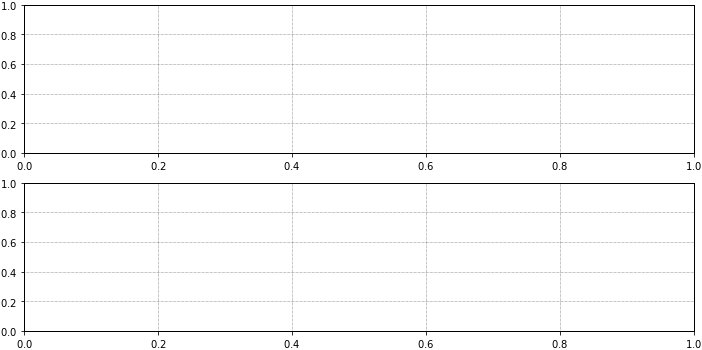

In [3]:
fig, (ax1,ax2) = plt.subplots(2,1,**size)
ax1.plot(n,...)
ax2.plot(t,...);

## 1.3 Anhören
Die Daten kann man sich im Browser anhören mit der `Audio` Klasse aus dem `IPython.display` - Modul:

`display(Audio((data=None, filename=None, url=None, embed=None, rate=None, autoplay=False)`

`data` kann dabei ein ein- oder zweidimensionales numpy-Array oder Liste sein, ein Filename oder auch eine URL. Der Parameter `rate` definiert die Abtastrate (nicht bei wav-Files, dort steht die Abtastrate im File.

In [4]:
display(Audio(data=y2, rate=8000))

<div class="alert alert-block alert-warning"><b> SIMULATION:</b></div>

Erzeugen Sie ein Stereosignal mit Hilfe eines zweiten Sinussignals mit 445 Hz und hören Sie sich das Resultat mit dem Kopfhörer an.

Sie können zwei Listen oder Arrays zusammenfügen zu einer Liste mit `list12 = [list1, list2]` oder Sie nutzen `a12 = np.vstack((a1, a2))`. Für Stereowiedergabe muss das Array die Form `(2, Anzahl_Samples_pro_Kanal)` haben 

Überprüfen Sie mit den Befehlen `np.shape(a)`, `a.size`, `len(a)` oder `np.ndim(a)` Form und Dimension des entstandenen Arrays. Was macht der Befehl `np.hstack()`?
appenden von arrays als zeilen des neuen arrays

Ein Signal transponiert man (vertauschen der Achsen) ganz einfach mit `a.T`. Falls sich ein Signal gar nicht abspielen lässt, versuchen Sie es einmal zu transponieren.

In [5]:
y3 = np.vstack((y2,np.sin(2*np.pi*445*t)))


# 2 Diskrete Faltung<a id='convolution'></a>

In diesem Versuchsteil definieren wir die Impulsantwort $h[n]$ eines zeitdiskreten Filters ausgehend von einem analogen Rechteckpuls $h(t) = \text{rect} (t/\Delta T)$ mit $\Delta T = 250\,\mu$s, der mit $f_S = 64$ kHz abgetastet wird. Die Impulsantwort ist daher eine Abfolge von $L$ Diracstößen mit gleicher Amplitude. Mit dem so definierten System filtern wir anschließend Rauschsignale.

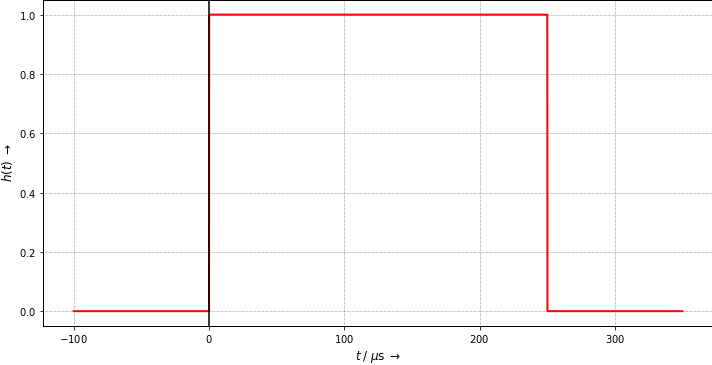

In [6]:
fig, ax = plt.subplots(**size)
t = np.arange(-100, 350, 0.1)
ax.plot(t, np.where((t >= 0) & (t < 250), 1, 0), 'r', lw=2)
ax.axvline(0, ls='-',color='k')
ax.set_xlabel(r"$t \; / \;\mu\mathrm{s} \;\rightarrow$")
ax.set_ylabel(r"$h(t) \;\rightarrow$");

Dieses System wird Moving Average (MA) Filter (gleitender Mittelwert) genannt, das folgende Bild zeigt den Signalflussgraphen eines MA-Filters der Ordnung $N=4$ bzw. Länge $L=5$. Die Länge der Impulsantwort entspricht der Anzahl der Taps.

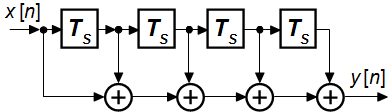

<div class="alert alert-block alert-info">
<b>VORBEREITUNG:</b>
</div>

* Welche Länge $L$ hat die Impulsanwort? $L = \frac{250 \mu s}{1/f_s} = 16$
* Wie groß ist die Abtastperiode $T_S$? $T_S = 15.625\,\mu s$
***

## 2.1 Einschub: Abschnittsweise definierte Funktionen in Python
Allgemein können Sie Funktionen abschnittsweise definieren mit:

### 2.1.1 List Comprehension
Mit einer sogenannten "List Comprehension" können Sie sehr kompakt eine Liste definieren oder modifzieren. Mit `y=[i*i for i in t]` definieren Sie eine Liste mit einer quadratischen Funktion über dem Zeitvektor $t$, mit `y=[i < T_0 for i in t]` eine Liste mit einer Funktion, die 1 ist für $t < T_0$ und ansonsten 0. Dabei wird das schlampige Typecasting von Python genutzt (True -> 1, False -> 0).

List comprehensions ähneln der mathematischen Schreibweise:

$$y = t^2 \text{ für }t \in \mathbb{R}  $$ bzw.

$$y = 1 \text{ für }t < T_0, 0 \text{ sonst.} $$ 

Mit einer zusätzlichen Bedingung kann man auch kompliziertere Funktionen erzeugen wie die Menge der Quadratzahlen aller geraden Zahlen zwischen 10 und 20: `m = [x**2 for x in range(10,21) if x%2 == 0]`. Mathematisch gesehen:

$$ m=\{x^{2}\in \mathbb {N} \,|\,10\leq x\leq 20,\,x \bmod 2 = 0\}$$

### 2.1.2. Schneller mit numpy
Für große Datenmengen und / oder hohe Geschwindigkeit sollte man numpy-Funktionen wie `np.where()` verwenden:


In [ ]:
t = np.arange(100) # Array 0 ... 99
h = np.where(t < 25, 1, 0) # 1 für t < 25, ansonsten 0

## 2.2 Plotten der Impulsantwort
<div class="alert alert-block alert-warning"><b> SIMULATION:</b></div>

Definieren Sie jetzt mit Hilfe einer list comprehension oder der `np.where()` Funktion die Impulsantwort des Filters und plotten Sie sie als `stem()` Plot über der Zeit $t$. Optional überlagern Sie im gleichen Plot den "analogen" Rechteckpuls.

**Tipp:** Sie können das Aussehen des Stemplots ändern z.B. mit `stem(n,y, 'b-', 'ro', 'k')` ('b-' blaue Linien, 'ro' rote Punkte als Marker und 'k' schwarze Grundlinie) 

C:\Users\David\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


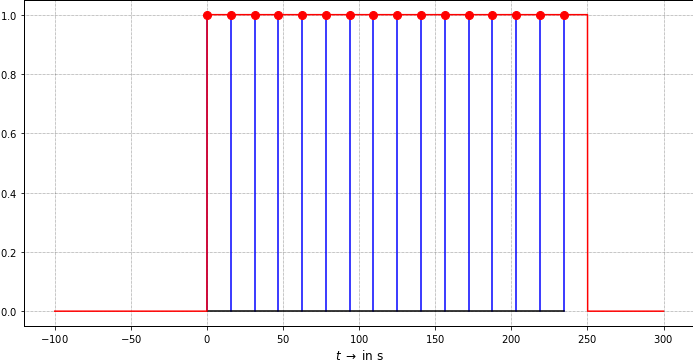

In [7]:
L = (250/15.625)
T_S = 15.625

t = np.arange(0,L*T_S,T_S)

#y = [1 for i in np.arange(L)]
y = np.where(t<=250, 1, 0)

fig, ax = plt.subplots(**size)
ax.stem(t,y,'b-','ro', 'k')
ax.plot(np.arange(-100,300,0.1),np.where((np.arange(-100,300,0.1) > 0)&(np.arange(-100,300,0.1) <= 250),1,0),'r')
ax.set_xlabel(r"$t \; \rightarrow$ in s");

## 2.3 Rauschen als Testsignal
Als Testsignal für das System verwenden wir gauss- oder normalverteiltes Rauschen: `x_n = np.random.randn(M,N)` gibt ein Array `x_n` zurück mit den Dimensionen $M x N$ und der Varianz $\sigma^2 = 1$ sowie dem Mittelwert $m=1$. 
<div class="alert alert-block alert-warning"><b> SIMULATION:</b></div>

Hören Sie sich zunächst das Stereorauschen in der nächsten Zelle an. Ersetzen Sie versuchsweise das normalverteilte Rauschen durch gleichverteiltes (uniform) Rauschen `np.random.rand(M,N)`. Hören Sie einen Unterschied?

In [2]:
x_n = np.random.randn(2,16000)
display(Audio(data=x_n, rate=32000))

<div class="alert alert-block alert-info"><b>VORBEREITUNG:</b></div>

* Wodurch unterscheiden sich normal- und gleichverteiltes Rauschen? Finden Sie es mit einem Lehrbuch oder Wikipedia o.ä. heraus!

normal: Wahrscheinlichkeitsdichte entspricht gauss verteilung , gleich: Wahrscheinlichkeitsdichte entspricht konstante

* Warum ändert sich der "Sound" des Rauschens im vorigen Beispiel, wenn Sie die Abtastrate in der vorigen Codezelle ändern?

Vergößerung Abtastfrequenz -> höhere Frequenzkomponenten des Rauschens hörbar da fmax = fs/2, audiosignal wird kürzer da samplezahl gleich bleibt

* Im nächsten Abschnitt sollen Sie das Rauschsignal `x_n` der Länge `Lx` filtern, indem sie es mit dem vorher definierten Filter (Länge `L`) falten. Wie viele Samples `Ly` enthält das Ergebnis der diskreten Faltung $y[n] = x_n[n] \ast h[n]$?

16015

* Welche Verstärkung hat unser Moving Average Filter für Gleichsignale?

16

* Sie können ein Array `t` mit passender Länge und Skalierung zum Array `y` erzeugen mit `t = np.arange(len(y))*T_S`. Wie funktioniert dieser Befehl (Ausprobieren, keine schriftliche Antwort erforderlich)?

np.arange(len(y)) erstellt eine numpy array mit len(y) vielen objekten, gefüllt mit 0 bis len(y)-1. Das mal T_S multipliziert gibt ein Array der diskreten Abtastzeitpunkte

***

In [ ]:
t=np.ones(16)
y_n0=np.convolve(x_n[0],t)
y_n1=np.convolve(x_n[1],t)
print("Ly = ",len(y_n0))
y_n = np.array([y_n0, y_n1])
display(Audio(data=y_n,rate=16000))

## 2.3 Falten und Plotten
Mit `np.convolve(a,b)` faltet man zwei eindimensionale Arrays, ggf. können Sie ein Array der Form (500,1) mit `np.squeeze(x_n)` in eine "flache Form" bringen oder aus einem mehrdimensionalen Array mit `x_n[0]` eine Dimension herausziehen. 
<div class="alert alert-block alert-warning"><b> SIMULATION:</b></div>

* Definieren Sie jetzt die Impulsantwort des MA-Filters ohne zusätzliche Nullen mit `h = np.ones(L)` und falten Sie das Rauschen mit der Impulsantwort per `y=np.convolve(x_n, h)`. Stimmt die Länge des resultierenden Arrays `y` mit Ihrer Berechnung aus der Vorbereitung überein?
* Stellen Sie ungefiltertes und gefiltertes Rauschen im gleichen Plotfenster dar. Skalieren Sie die Zeitachse in Sekunden.
blau ungefiltert, rot gefiltert
* Passen Sie das Filter so an, dass die DC-Verstärkung 1 ist und vergleichen Sie ungefiltertes und gefiltertes Rauschen.
filter koeff mit 1/16 multiplizieren
* Welche Art von Filterung (HP, TP, ...) hat das Moving Average Filter? Erhöhen Sie die Länge des Rauschsignals und hören Sie es sich an (Sie müssen das Signal mit `y.T` transponieren - ich habe auch noch nicht verstanden warum). 
Tiefpass

16015


Text(0.5, 0, '$t \\; \\rightarrow $ in $\\mu$s')

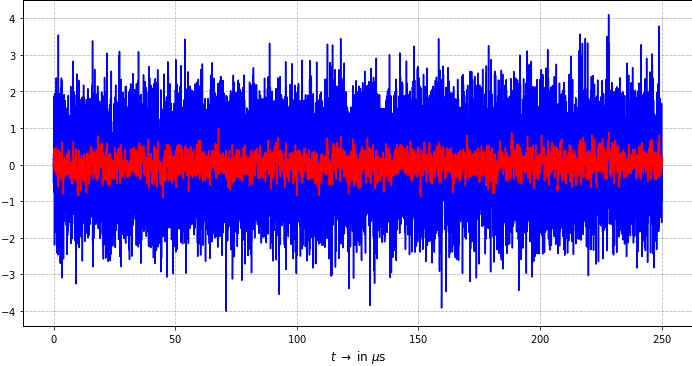

In [30]:
x_n = np.squeeze(np.random.randn(16000,1))
h = np.ones(16)*(1/16) # MA-filter mit Länge L - setzen Sie den passenden Zahlenwert ein
y = np.convolve(x_n, h)
n = np.arange(len(y)) * 15.625 / 1000
print(len(y))
display(Audio(data=x_n, rate=16000))
display(Audio(data=y, rate=16000))

fig, ax = plt.subplots(**size)
ax.plot(n,np.append(x_n,np.zeros(len(y)-len(x_n))),c='blue') #raw
ax.plot(n,y,c='red') #convolved
ax.set_xlabel(r"$t \; \rightarrow $ in $\mu$s")


## 3. Transferfunktion von LTI-Systemen<a id='lti-system'></a>
Zeitdiskrete Systeme werden in Python und Matlab meistens über die Koeffizienten $a_i$ des rekursiven Teils und die Koeffizienten $b_i$ des nicht-rekursiven Teils angegeben:

$$ H(z) = \frac {Y(z)} {X(z)} = \frac{b_0 + b_1 z^{-1} + b_2 z^{-2} + b_3 z^{-3}}{1 + a_1 z^{-1} + a_2 z^{-2} + a_3 z^{-3}} 
$$

Aus den Koeffizienten erhält man nämlich sofort den Signalflussgraph in der sog. "Direktform":

<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAU4AAACSCAMAAAAdBtO7AAAACXBIWXMAAC7hAAAu5wGLE5KDAAABm1BMVEUAAAAAADoAAGYAOjoAOmYAOpAAZpAAZrYBAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkLCwsNDQ0QEBASEhITExMUFBQYGBgZGRkgICAkJCQmJiYoKCgwMDA2NjY3Nzc4ODg6AAA6ADo6AGY6OmY6ZpA6kLY6kNs9PT0/Pz9AQEBGRkZHR0dISEhPT09QUFBSUlJTU1NXV1dYWFhZWVldXV1fX19gYGBjY2NmAABmAGZmOgBmOjpmOpBmZmZmkLZmkNtmtttmtv9nZ2doaGhtbW1vb29wcHBxcXFycnJ3d3d4eHh/f3+Dg4OHh4eMjIyNjY2Pj4+QOgCQOmaQZgCQZjqQkJCQttuQtv+Q27aQ2/+VlZWXl5eampqbm5ufn5+jo6Onp6eoqKivr6+1tbW2ZgC2Zjq2kDq2tma2tv+227a22/+2/7a2//+3t7e8kDq/v7/Dw8PHx8fPz8/R0dHX19fbkDrbkGbbtmbbtpDb25Db29vb/7bb///f39/g4ODn5+fv7+/39/f/tmb/25D/27b//7b//9v///+HkaCvAAAPWElEQVR42u2d/WPbRhnHL+26NG1abRgmDDZzeAsTGMPMcMMGo8EQmDWDy9soZsZ10wJjQbVjDxhVJTlL9Geje9GL9ZZ7k11vvh+StLa+evTRc8/dPXc6AXdTJBawQbDBuTY4z/bAtafk74t7YOv+BpEYzsPIv+Y0OC0jr5jUpuTrMAgVpLcknAOQV3RqU/J1GIQK0qPHOYMV/PjKhz7O+ZV/vAle+IAWp6ZnlQYTzmwdJqGC9Ohxnh8cujOEDuOcbX3j6cXvtmlx6lyfMX13wINTrh5DZT++9t+9/aCyX9xD3nrt6QYnH06vQd8OYyd0Vo/pxjt5cV7cg4HTx4konnnuusHJh3Pm9zARTtQyQZQMOOdhmxl0XPlwpioJ4JSlR49zDvaPw8oOqzlmyoBzFhq9LeadqUoCOGXpUeM8PwjCJMQZhE4WnMeh0ftiOFOVBHDK0qPFiQLnxb2gZUcQEVPG2HmcGJTyxs6EkmDslKG3tFGRHozxI2FTBGdSSQynFL1l4wx6W8I4k0piOKXoyc0oWYlj7Zhl84WwmWm1dfnlJ5VShGx6nFR6ReDM+aY2iv1Pq9yzo5bNkvm8FKvHoDXBfz3sZX13RhOEFd+g096zhQ+mTYNHb8k4ASj3Ib4nNwB4F+EEoHRkBpZ5zkzGArlWG54QBPHw9s7NnXdTv5uilCKEDHJc943rN3f+GjtDdcCut3ScGN8t7/fuQ4zTK413iGXnB4mWKAsnAJXB9Ze9XzvP0r6bopSOEwBV//XNmA4+g9r9M6OedJwtwFd0P+zuM+YcM1KQKUrZQjvXZepVl+qdsJrCX7t3AvrlH4Sjj0OX1jtBA0Avv36a9t0UpSzvBNXv7cZ0/DMARj1GHuI4ldbU++PVXbDzeZvg9PCGow8/3j8C4Op7eTiVtun2buxcv34nfziQK4RuitfovHoD7LyRuGGq/oeU4UUguHqcqk66OHfAd1AnpaWgNppYFsb7+ZX77mP8dypOtYsOt3vgNGs4gI/OF0I3BZb3wcP4DasMnBS9iODKcRqJg6ZWuuPMwN2cOuUMM06e/G6+0ImdcRHJjlJScOU4Mw9KWOZF/qt3aRrQy3DSCgHalGYouEY43U/e8mO/GE5aIWqcoeA64YRusC0DJ6UQPc5AcH1wzrcO3bMDCd5JLUSLMyK4PjgvHu+BrZ9KiJ3UQrQ4I4LrVdnpxnL0OvIq+/q17BucG5wbnJ9WnK3MVX8dJpzZOvlCWTg59JaCc3EGKYGBct1fTIVNJ08oC+flepeYVBDO2BTc4kETPa8YmSpsOnlC6RdBo3eJSQXhnC0msznPOYunxHltjwvxM5BmEtPhxy8+Alt3Rc8ZU+G3PS7Ez0CaSSyHnx94p8TLadth8BkzniqiImZ7QoibgTSTmA6HaxO9U8P5Flv1abZZTxVRcQ0NFgB/dFwBIase6DQcV0TJdbswogIUV51CcaKATRYxDQlN1WY9VVTFrfl3RZm4IkKdoLL0Oa5+wSQ9kDoq1jtRwPZvYh2fcsgX9n2ViUJMZ3fOBSGnTHRq3C2Rb5JT8T3FKRYnWvt59tX7F/fAtmshEA2OsE9UvKs4DNyq7HAL/ekATgGdcDt5/MKCGdBRsbETLv/ETx7su8eHbg9ab3GEfaLiHsOEOHGrE5db6F+H7szzqyavky9e2KP7wTqMgpuis72rf3T/7YWZj+673ondKgA9nrBPVM7/Dr0T+0LLFRDyYp8nZMHGscJVPyNKF7/9kEgpZsE451f++SZ4wTvpI4xzwrVWIlDBlR35gmoJCZ3/+CkZTBpcFx9ROtj2x6XdpaVAiHe6YOIKFYzT84WBkMz5j/Dsucbl5HG0+7idrTpLw4ljp/hT2zN//kdI5exrZFXcFFjiBmGcJvPgRAAnbgCl4RTUOQ6eHRB+KD9c7L36fOeST16gzgbnBucG5wbnBudnCmdf07RbmtYU1RljHU3C1h4SpNjJkIRnV9R20VwYKU5Jxpp2LIUvrbJU7zzCHCaixlflyBB7ejJqeldYih2niR85ELZ9KJq9IcUSTFFGpWDuseQsFafbEMwJRqvWiQQIDd78XLK0RcMPB86JpFDVlSMDo7BiycEJL81aMk7OfGda1RpIgVCVkVHCpS4YfnhwjiSFqrYcGS8KT2ThHC0zo4SLbbzyuiFuuWP85leGLa5jG3/5uSELp/nLnjFZIk67T+b7agMR13IGZGa40hciKskcwrJD+tTNkyXh7HtdiWpT1+veVZT4W3fD63tX6rre9KAqAnFYkjn4DsM5PK2tdzQPamW6BJyO15FokxONm/zdEx2AOolRptcLb3I6qNOSYw42pArULmnVhzXem8OEswXUSKQeKJx9NB0okSUbY5V3TNAAqiHBHBw1ykCzF264UTTOPlAXsgPTEldv/iS2xsCu8D2q3wXlhT7iVBUYXMR7SPFrlY9zqpA7NvGXro54+s92iXQ3AxlPmKM1nQBlHDenxNsH74GyvSjW4lqmw4DzyHeicJl+m8Oven6nO5TpAY48XctPaoU6Le7hRdnvbwZiTpnnHtPjdEq+K4b2W0Cld0ryOHzFNzOUCaVpxkBojwLXVvxcRagzoTcHn7dn+fGn7rLfY7s+5Mc5CoZykYdI6tSjCJNs1jAJGp6ITJthOWHZ6xacwKFQW8QcYpPSMvH5h27KPUa/T187zb4ktFUOF85eUJMi9h9RD7txXq9ujIL2NyIzYOjklPFGN3pw5oXbMmTDSfa/0ICZFKvAbMgTuHGLYmcfXupYXDjbqN2cGIbxDvghfDRnihh3mHAC8EV0V6ahzARVtiYbTu8SUbsYMcdEjX2XGSfcdElFGIxQzHaDhayXl5bFgbOF7NciKi7rxj64DNyFLYZg3Td4thuaLJqjo+4NV1FvlxCLsMBLbcKfjRvwn09yPYQLJ65dA13XvwtegwvIR+g/eyyeUBuS2jQKZQZuNBDSeWe5Zx+hyhIxBxLosC3pNslw360C6I56KAZdvQa8+vdwB24r9Ex+ZR8G9ToSX1rU+XQTRyl3HNTriAxLJS2jHdHSQ3mLLb0PeTTHaHw1SYqVAWxmvrWLN42S3RRNg9x55JQqdQ/H0XG0txU10cHxHIEeQx/3s8dBNzvSGKtswwoL7gGHb2fSVfxVrA/AgyI6Sl6cMuKnHHEkr1t+kxy1nGMytprsv/Z5c+lWyj1u+u7PMg5n+O7QXzJ9og2CvAF7ZnDsrzkOZLwbxTGa6YFa0hzeXHrD774FYkYwpVkQTqcWn5NpBIMJNtO1eCPHs7TdqcQzSE3+iZ6pEkufWGpwiwvCCU8RvQDnyM8bMHNoRvF1FYUrWWuWFhowXnOC9Em0ok0j03npiNK34WXKdxolUAuufFwBKt+0ylQFlSCbaNaBMuRDcCLHnCDD2QnuxqDkR5IcnGmbRLNNbphVb5w4MsypMax5HXDedJhdh0MRY2oao4Y3YOSmMJVjDvHPEii1vfHQ2OiVFxYvFIfTdbr+Q3ug0hewfVAJRiS6wNyb01WlmINjWdt/sBHlWFJxoqcO0RsK0l/sxD4xPOx8CWh1XXQ5jKFrX35F6wxFIQw72ldufVuXsTrHtfttTdOaXTOzeZnD3SrJG17SXuzEMc/uqEDOGpYqmErROQJ9t8ASRQQfKcWvJEl/sRMHzpGkFVYjCas78ThLzlonGpzw1RnIQzNe7AR4nErOoppGZiKRtT8vZyUeDc6Le/uRl5MkX+zEjnPM+yx+rExkrXJV5awTpeuaH+9j58x4sRPgcSopKwlRylOVEjO8Ml0SztmLZG+G9Bc7MeMkOVPh2oV3GZCw7LYmZ409Jc45iLzFLfliJ2acZGm8cO3qCOw5kYgZkqIwBc6zvf2wG598sRMzzqlh3AKGIbyiEs4WeTpjUR0b6xjOkiq7//IOKaMiXE8/xY9pXaL+ycGhKxun+1nFeX7g7x0sJaP0WcdZkCUbnBucG5wbnBucG5yrxelIMt/a4IRFl/SUWQPIGRn2gbHGOKeK+EgblhHHlqqpTl7i3ILu+cCpycl3ogewxxIut7m4C/qa4URLOkvis0UoNVUVdyu0gacyXVOcFp6KFd4SZSJnSxF/H1BtTXG2xLdgRaVK8pRTGU5O1jSvB86P9sK91YNl1zyzbxGhXnQtt4DOJLDHWhOcxy984P6HZPeC7ZZ5phMiQpaysFSeW8d3cs6NaleAk0wo45y+jV6nAtBPVrOiQmaoMxHREbFnVZX94uOP/7aQe148yDLyipkjVIwOnZ5hrso7t77+k98vvDmF7wU7SaFidOj06LuqknCe7QFw7SmuVbMrH/pby6Zg0DLfYtNAViOl//lC5wf+5KqYzmW71ObpEcHleyfaNx8ubSJ7q6dhoHo5WSA0w/u9C+vg/efzcPK+7KxAnOcH33x68Qg5JtpbnRtDRAjt9y6sQ/afXy+csIZtvQ1fRkD2VufFEAqR/d7FddYRZ6TM9/NwzsMwH0yZplrt7/cuqkOJM01v9TiDvdWzMMxCs7fzrA72exfUocWZprd6nOHe6hkYjkOz9/OsztrvnVWHFmea3nNR2d1LY+cxWHy1H+9rR0V0aPTWA2fEg4VwCunQ6K0HTq/R3XYl4BTSodFbD5zzaHgSwCmkQ6O3Hjhn2SHKsaToGIN8e0w6vfDD6fOL0wtR/mrS2GeWXkrkI2sAvGIz6TiDakq6uQfATbJZx0m45Uy+ni/YK2vPL87zg/SIP20pyfRuTQVA/QKDjqWradn7093b4OXbCDbMbZtUeliwU6KZDSgeZ0auy4v4KSHKqKdmy9F/7jxJw5mm84uWkj4ZcmcXbn7yxNbxnKBJped9+LMW5eRK4Th7Gd7pjT8OmXKOGbclTef75GHWm1L0WAwrFY0zq5EMOsuPALj6HvnMIU8Hx73zpTIAn9t9Rq3jDqqp3vTgJtqaZ0q818zTiwq+rhUwoywTZxDx51fuu4/Rn/izEy0F5xPlJWX3AZOO0Ui7/NcU5da7uLlLxxm2RIuCk+ZzjTMcS4O7sc8mreRMo93rnbLqmO2U9RLv9x6Szli/nOqdmYLmUWkNcHqh/+rd2GeWKUfnkjLO7aknBe3J84/T/eQtEvwZBh/SdPIGPkKCK8MJ/WBbAk4unfxxpIDginDOtw7dswNx7+TUycYpKLginBeP9wB5PEwIJ6dONk5BwRVWdvbEjTQdqmM2ODc4Nzg3OFeOs5W5TK3DhFOODo0el+CycEpZqCZNhzJpVAjO/wNo98TVEq5hoAAAAABJRU5ErkJggg=="/>

Sie können mit der Software [pyfda](https://github.com/chipmuenk/pyfda) die Eigenschaften des Systems visualisieren und eigene Filter entwerfen. Im Tab "b,a" importieren Sie Koeffizienten aus einem CSV-File oder (nach Auswahl von "Clipboard" in den Einstellungen) direkt aus der Zwischenablage. Die Koeffizienten `b` des nicht-rekursiven Teils geben Sie hierfür getrennt durch Kommata an, optional in einer zweiten Zeile die Koeffizienten `a` des rekursiven Teils.

Alternativ arbeiten Sie mit dem Notebook [LTF-Filter_properties.ipynb](../02_LTF/LTF-Filter_properties.ipynb), das Ihnen ebenfalls die wichtigsten Eigensschaften darstellt. Aus diesem Notebook können Sie auch leicht Code zum Plotten verschiedener Filtereigenschaften kopieren.

# 3.1 Analyse des Moving Average Filters aus Abschnitt 2
<div class="alert alert-block alert-info"><b>VORBEREITUNG:</b></div>

* Geben Sie nicht-rekursiven Koeffizienten des Filters an. Vergleichen Sie dazu obige Abbildung der Direktform mit der Abbildung des Moving Average Filters.

$b = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]$

* Begründen Sie mit Hilfe der Systemfunktion $H(z)$ ob das Filter linearphasig ist.

Ja da typ 2 linearphasiger filter (gerade symmetrie Koeffizienten, ungerade Ordnung)

* Welche Gruppenlaufzeit hat es?

$\tau _g = \frac{N}{2} * T_s = 117.1875 \mu s$

* Berechnen Sie die Frequenzen, bei denen der Betragsgang Null wird (siehe z.B. Folie LTF-54 oder Musterlösung zu Aufgabe 2.11).

$f_{nst} = f_s/2 = 32 kHz + n*4khz$

* Wie müsste $h[n]$ aussehen, damit die Gruppenlaufzeit $\tau_g = 0$ wäre?

???

***
<div class="alert alert-block alert-warning"><b> SIMULATION:</b></div>

* Plotten Sie Betrags- und Phasenfrequenzgang, Gruppenlaufzeit und P/N-Diagramm.

* Lesen Sie $H(f=0)$ aus der Simulation ab und vergleichen Sie mit Ihrem berechneten Wert.

* Stimmt die simulierte Gruppenlaufzeit mit der berechneten überein?

[array([ 4000.,  8000., 12000., 16000., 20000., 24000., 28000.])]


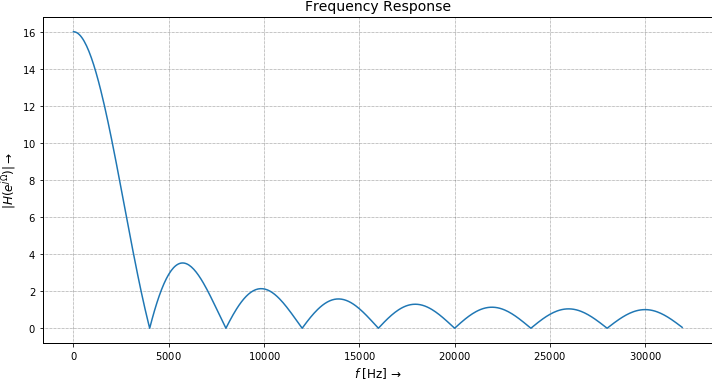

In [32]:
f_s = 64e3
T_s = 1/f_s
a= 1
b = np.ones(16)
fig4, ax4 = plt.subplots(**size)
[W, H] = sig.freqz(b, a, whole=0)
f = W  / (T_s * 2 * np.pi)
frequenzies = np.where(abs(H == 0))
print([f[i]for i in frequenzies])

ax4.plot(f,abs(H))
ax4.set_ylabel(r'$|H(e^{j \Omega})| \rightarrow$')
ax4.set_xlabel(r'$f \; \mathrm{ [Hz]} \, \rightarrow$')
ax4.set_title('Frequency Response')


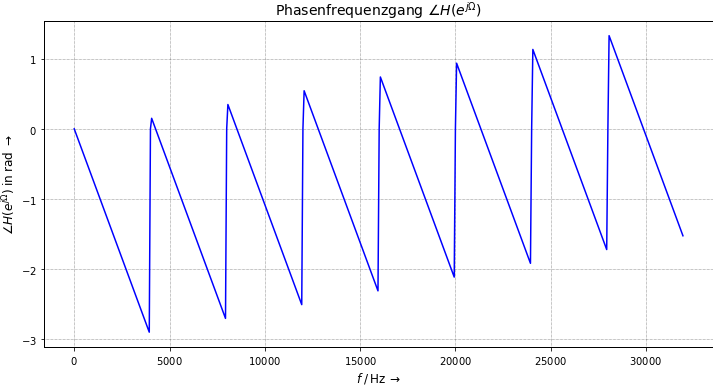

In [33]:
fig, ax = plt.subplots(**size)
[W, H] = sig.freqz(b, a, whole=False)
f = f_s * W  / (2 * np.pi)
ax.plot(f,np.unwrap(np.angle(H)), 'b')
ax.set_ylabel(r'$\angle H(e^{j \Omega}) \mathrm{\;in\;rad\;} \rightarrow$')
ax.set_xlabel(r'$f \; \mathrm{/\,Hz} \, \rightarrow$')
ax.set_title(r'Phasenfrequenzgang $\angle H(e^{j \Omega})$')


C:\Users\David\anaconda3\lib\site-packages\scipy\signal\filter_design.py:685: UserWarning: The group delay is singular at frequencies [0.393, 0.785, 1.178, 1.571, 1.963, 2.356, 2.749], setting to 0
  format(", ".join("{0:.3f}".format(ws) for ws in w[singular]))


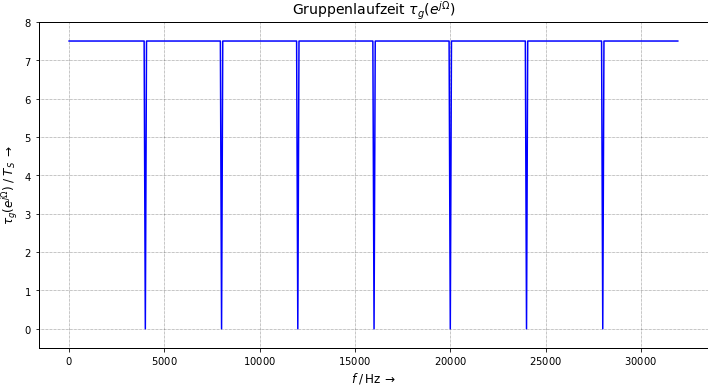

In [36]:
fig, ax = plt.subplots(**size)
W, tau_g = sig.group_delay((b, a));
f = f_s * W  / (2 * np.pi)
ax.plot(f, tau_g, 'b')
ax.set_ylabel(r'$\tau_g(e^{j \Omega}) \;/\; T_S \;\rightarrow$')
ax.set_xlabel(r'$f \; \mathrm{/\,Hz} \, \rightarrow$')
ax.set_ylim([min(tau_g)-0.5, max(tau_g)+0.5])
ax.set_title(r'Gruppenlaufzeit $\tau_g(e^{j \Omega})$');


$Gruppenlaufzeit\, in\, \tau /T_s\, angegeben: 7.5 * T_S = 117.1875 $

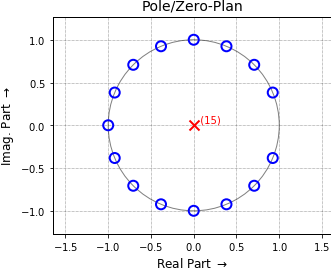

In [35]:
fig3, ax3 = plt.subplots(figsize=(5,4))
ax3.set_xlabel(r'Real Part $\rightarrow$'); ax3.set_ylabel(r'Imag. Part $\rightarrow$')
ax3.set_title('Pole/Zero-Plan')
dsp.zplane(b,a, plt_ax=ax3);

***
### Copyright

(c) 2016 - 2021 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp.

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing - Vorlesungsunterlagen mit Simulationsbeispielen, 2020*.